<a href="https://colab.research.google.com/github/poorvi-sharma/ML_TCR_PROJECTS/blob/main/Final_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT FRAUD DETECTION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the packages**

In [2]:
# We import the required packages

# We use Logistic Regression to predict the fraud and non-fraud credit card transactions.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

**Loading the dataset**

In [3]:
#Loading the dataframe from the CSV data file.

dataframe = pd.read_csv('/content/drive/MyDrive/DATASET/creditcard.csv')

In [4]:
#Viewing the first 5 data rows to get a better idea of the dataset.

dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Explorartory Data Analysis**

In [5]:
#The complete information about the data in different columns.

# there are no categorical values in the dataset

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Let us understand the shape of our data

dataframe.shape

(284807, 31)

In [7]:
# Checking for duplicate values in the dataset

duplicate_rows = dataframe[dataframe.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape )

Number of duplicate rows:  (1081, 31)


In [8]:
# removing the duplicate values
dataframe = dataframe.drop_duplicates()
print(dataframe.shape)

(283726, 31)


In [9]:
#We can understand the dataset by the various analytics about it

dataframe.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


***Summary:***<br>
The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.<br>
There are no "Null" values, so we don't have to work on ways to replace values.<br>
Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

**Fraud and Non-Fraud Transactions**

In [10]:
print('Legit Transactions:', round(dataframe['Class'].value_counts()[0]/len(dataframe) * 100,2),'%')
print('Frauds Transactions:', round(dataframe['Class'].value_counts()[1]/len(dataframe) * 100,2),'%')
# the classes are heavily skewed we need to solve this issue later

Legit Transactions: 99.83 %
Frauds Transactions: 0.17 %


In [11]:
# Thre are no null values in our dataset

dataframe.isnull().sum().sum()

0

In [12]:
# Let us know the columns present in our dataset

dataframe.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The information about frauds is present in the class column. To undestand the nature of this column we plot a graph of its two different values.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

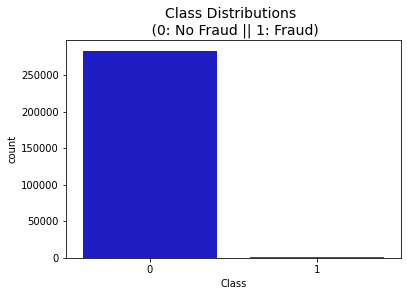

In [13]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=dataframe, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

We can notice that the dataset is highly imbalanced. <br>
Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.

**Time and amount distribution**

By seeing the distributions we can have an idea how skewed are these features.

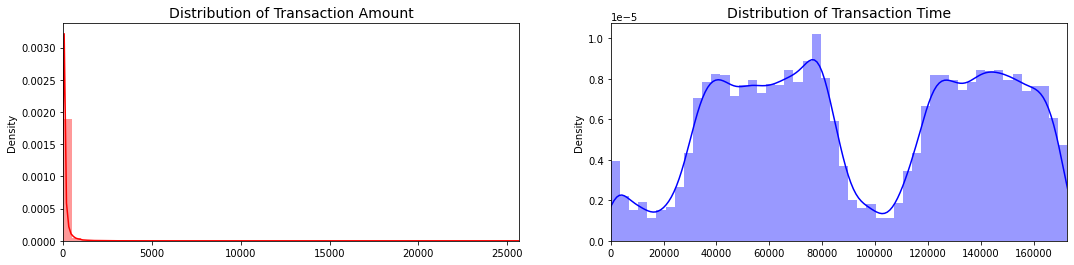

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataframe['Amount'].values
time_val = dataframe['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

We can see that only time and amount are not scaled in the dataset so we scale them to reduce the skewness and make the data uniformly scaled.

**Scaling of Time and Amount**

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataframe['scaled_amount'] = rob_scaler.fit_transform(dataframe['Amount'].values.reshape(-1,1))
dataframe['scaled_time'] = rob_scaler.fit_transform(dataframe['Time'].values.reshape(-1,1))

dataframe.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = dataframe['scaled_amount']
scaled_time = dataframe['scaled_time']

dataframe.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataframe.insert(0, 'scaled_amount', scaled_amount)
dataframe.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

dataframe.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
# The value of fraud and non-fraud transactions have a huge gap

dataframe.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

As the values are very different therefore we cannot perform the regression on this data and we need to make a sample which has the data of both fraud and non-fraud values equally.

**Sub-sampling of data**

It is necessary to create a sub-sample as the data is overfitting and  our classification models will assume that in most cases there are no frauds!<br> We want for our model is to be certain when a fraud occurs.<br>
By having an imbalance dataframe we will not able to see the true correlations between the class and features.

In [18]:
# Creating a sample

dataframe = dataframe.sample(frac=1)

# amount of fraud classes 492 rows.

fraud_df = dataframe.loc[dataframe['Class'] == 1]
non_fraud_df = dataframe.loc[dataframe['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows

new_df = normal_distributed_df.sample(frac=1, random_state=42)


In [19]:
# New dataframe head

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
41273,-0.292032,-0.517944,1.233761,0.336756,-0.174107,1.073067,0.077631,-0.763145,0.362654,-0.124091,-0.034990,0.049660,-0.418898,-0.567806,-1.658103,0.917386,1.113141,-0.432998,0.059301,-0.618993,-0.600287,-0.292888,0.011443,0.047530,-0.095563,0.050288,0.724719,-0.261205,-0.002018,0.003936,0
27362,-0.284800,-0.589606,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,1.120505,1.237773,0.342362,0.038372,-1.194503,0.085406,-0.219143,-0.694259,-0.655270,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1
167305,1.166597,0.398510,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,1
95597,18.526631,-0.226898,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,1.277202,-3.701750,-0.971870,-4.857777,0.090606,-2.801502,-4.186808,-1.648406,1.176446,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
249607,0.180782,0.820282,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,-4.029129,2.528943,-3.308722,-1.992010,-5.757216,-0.877323,-1.547552,-1.909017,0.500567,0.136722,2.932758,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,1


**Equally Distributing and Correlating:**

Distribution of the Classes in the subsample dataset
0    0.509845
1    0.490155
Name: Class, dtype: float64


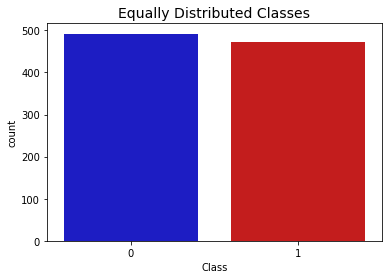

In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

# We now have the data equally distributed in the Class

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

**Correlation Analysis of the original dataframe**

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

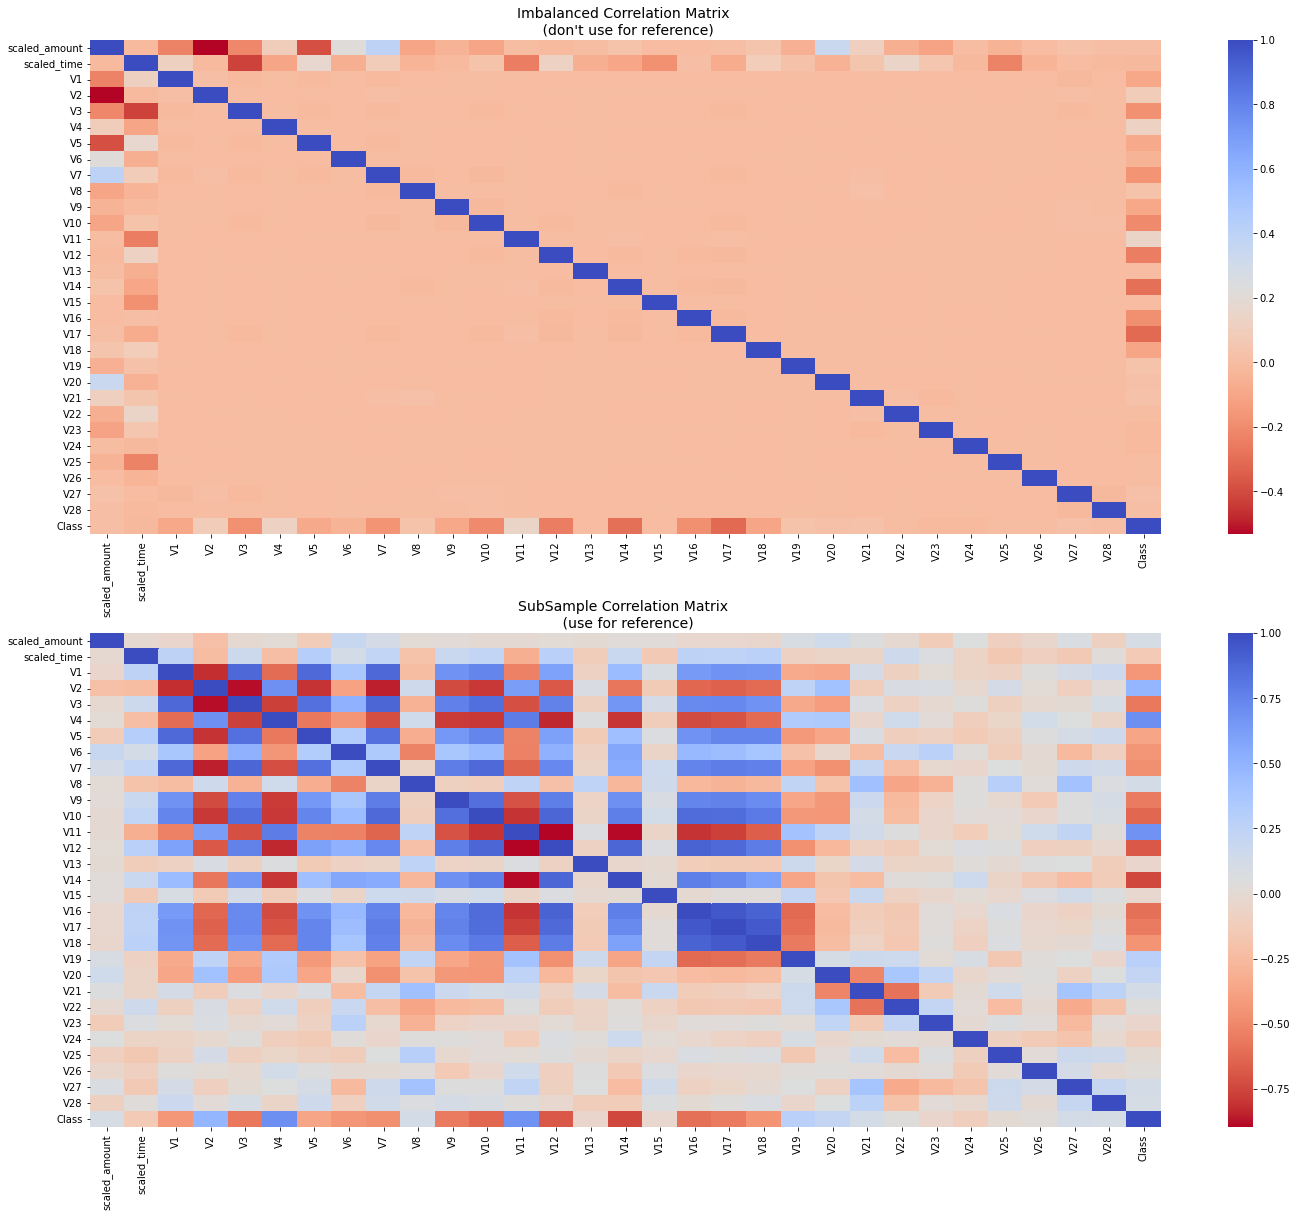

In [21]:

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = dataframe.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# The new dataframe
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

*The correlation can be better infered from the sample as compared to the original dataset.*

**Box plot for negative and positive correlations**

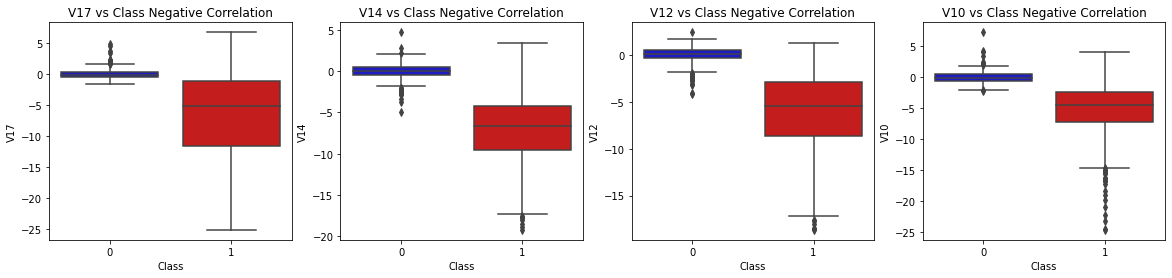

In [22]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class - The lower our feature value the more likely it will be a fraud transaction

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

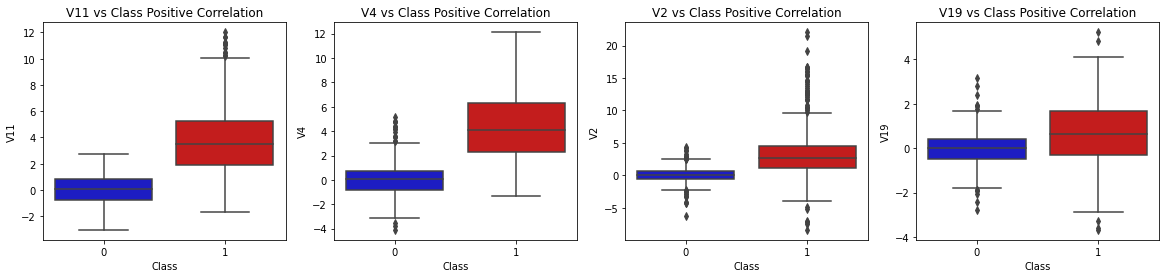

In [23]:

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

**Regression on the sub-sampled dataset**

We have a new dataframe from the sub-sampling we did.

In [24]:
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
41273,-0.292032,-0.517944,1.233761,0.336756,-0.174107,1.073067,0.077631,-0.763145,0.362654,-0.124091,-0.034990,0.049660,-0.418898,-0.567806,-1.658103,0.917386,1.113141,-0.432998,0.059301,-0.618993,-0.600287,-0.292888,0.011443,0.047530,-0.095563,0.050288,0.724719,-0.261205,-0.002018,0.003936,0
27362,-0.284800,-0.589606,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,1.120505,1.237773,0.342362,0.038372,-1.194503,0.085406,-0.219143,-0.694259,-0.655270,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1
167305,1.166597,0.398510,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,1
95597,18.526631,-0.226898,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,-4.320536,1.277202,-3.701750,-0.971870,-4.857777,0.090606,-2.801502,-4.186808,-1.648406,1.176446,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1
249607,0.180782,0.820282,-7.381547,-7.449015,-4.696287,3.728439,6.198304,-6.406267,-5.831452,1.457175,-0.646203,-4.029129,2.528943,-3.308722,-1.992010,-5.757216,-0.877323,-1.547552,-1.909017,0.500567,0.136722,2.932758,1.176575,-0.978692,-0.278330,-0.635874,0.123539,0.404729,0.704915,-1.229992,1


In [25]:
new_df.keys()

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

**Splitting the data**

In [26]:
# Splitting the data in the x and y parametrs.
# x is the parameters to be feeded in the model for prediction.
# y is the prediction values.

x = new_df.drop(columns = ['Class'], axis = 1)
y = new_df['Class']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)
print(X_train.shape , X_test.shape)

(772, 30) (193, 30)


**Logistic Regression**

In [28]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Accuracy Score**

In [29]:
y_pred = model.predict(X_test)
print("Accuracy score:",(round(accuracy_score(Y_test, y_pred)*100, 2)),'%')

Accuracy score: 95.34 %


In [30]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_prediction)
print('Training Data Accuracy : ', training_data_accuracy)

Training Data Accuracy :  0.9481865284974094


In [31]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Testing Data Accuracy:', testing_data_accuracy)


Testing Data Accuracy: 0.9533678756476683


**Confusion matrix**

[Text(0, 0.5, ''), Text(0, 1.5, '')]

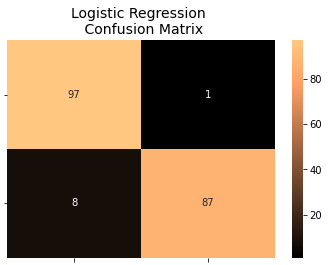

In [32]:
log_reg_cf = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)
ax.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax.set_yticklabels(['', ''], fontsize=14, rotation=360)

**Classification Report**

In [33]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.99      0.92      0.95        95

    accuracy                           0.95       193
   macro avg       0.96      0.95      0.95       193
weighted avg       0.96      0.95      0.95       193



**Test Case**

In [34]:
# Here we have a row from our dataset.

input_data = x[6:7]

In [35]:
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0] == 0):
  print("This isn't a fraud transaction")
else:
  print("The is a fraud transaction")

[1]
The is a fraud transaction


**Verification of our prediction model.**

In [36]:
# Original output

output_data = y[6:7]
output_data

# It states a fraud transaction as per the features provided.

8845    1
Name: Class, dtype: int64

*We can see that the original and the predicted values are same. Therefore our model works.*

Submitted by : Poorvi Sharma